Land Panels R2: 0.9998421657530984
Floating Panels R2: 0.9998824204355109
Total Panels R2: 0.9998736196773291


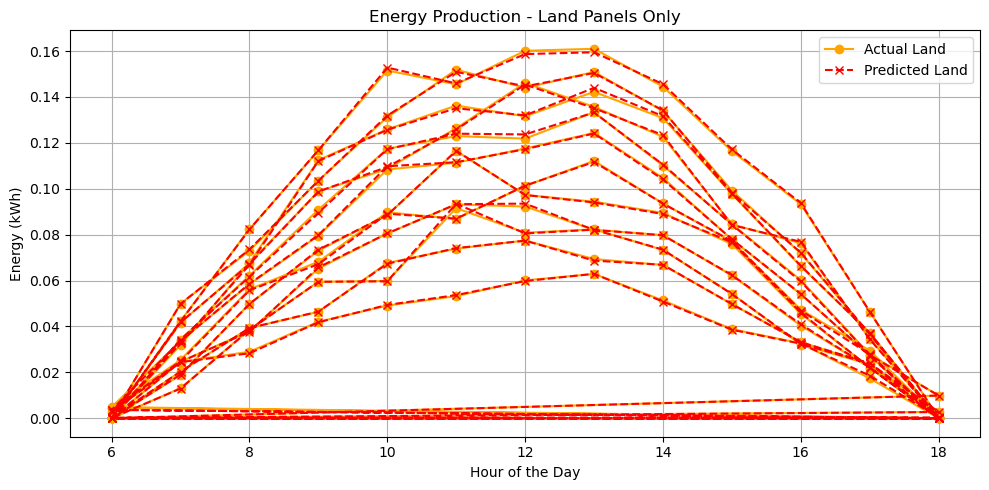

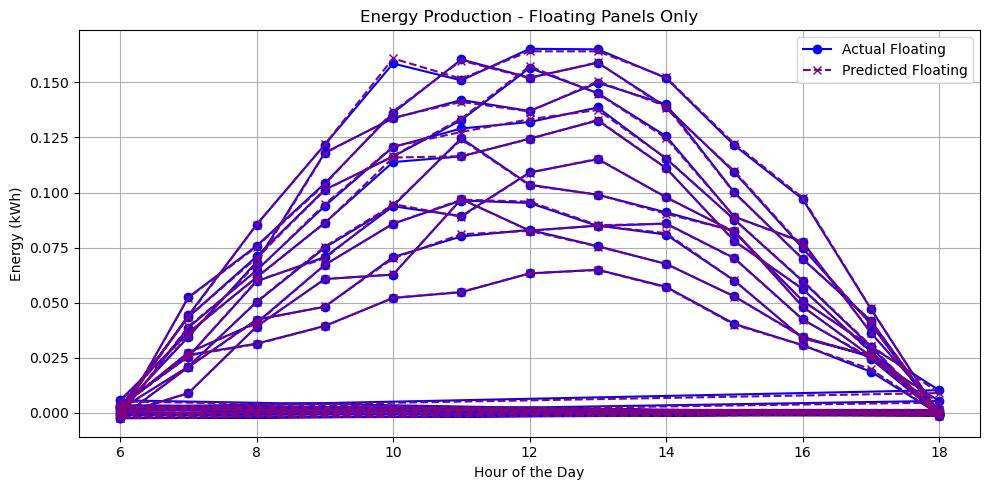

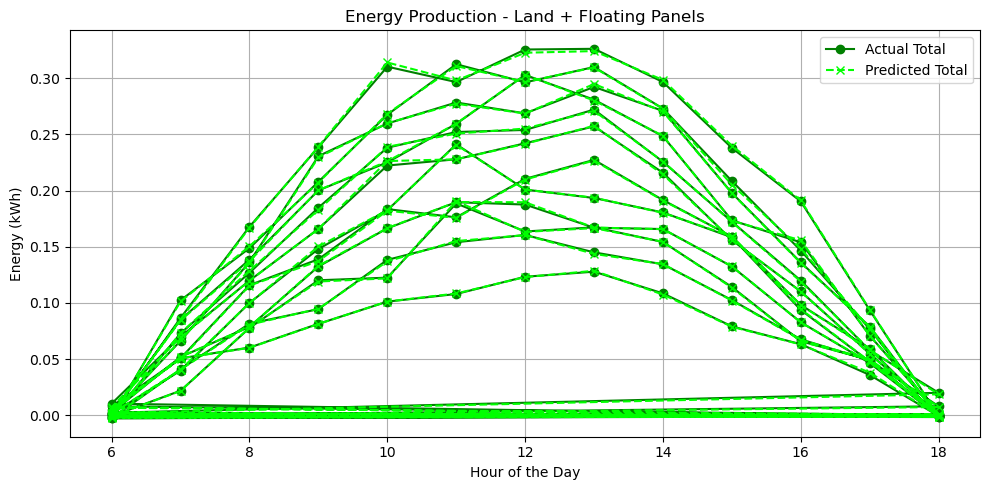

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# ---------------------------
# 1️⃣ Generate Semi-Realistic Dataset
# ---------------------------
np.random.seed(42)

hours = np.arange(6, 19)
months = np.arange(1, 13)

data = []
for month in months:
    month_factor = 0.3 + 0.05*month
    for hour in hours:
        irradiance_land = max(0, (np.sin((hour-6)/12*np.pi) * 1000 * month_factor) 
                             + np.random.normal(0, 30))
        irradiance_water = irradiance_land * 1.05 + np.random.normal(0, 10)
        
        temp_land = 10 + 15*month_factor + np.random.normal(0,2)
        water_temp = temp_land - np.random.uniform(2,5)
        
        panel_efficiency = 0.18
        area_land = 1
        area_water = 1
        
        energy_land = irradiance_land * area_land * panel_efficiency / 1000
        energy_water = irradiance_water * area_water * panel_efficiency / 1000
        
        electrolyzer_efficiency = 0.7
        h2_land = energy_land * electrolyzer_efficiency / 33.3
        h2_water = energy_water * electrolyzer_efficiency / 33.3
        
        data.append([month, hour, irradiance_land, temp_land, energy_land,
                     irradiance_water, water_temp, energy_water,
                     h2_land, h2_water])

columns = ['Month','Hour','Irradiance_land','Temp_land','Energy_land',
           'Irradiance_water','Water_temp','Energy_water','H2_land','H2_water']
df = pd.DataFrame(data, columns=columns)
df['Energy_total'] = df['Energy_land'] + df['Energy_water']
df['H2_total'] = df['H2_land'] + df['H2_water']

# Save to Excel
df.to_excel("Hydrogen_Simulation_Data.xlsx", index=False)

# ---------------------------
# 2️⃣ ML Model Scenarios
# ---------------------------

# --- Scenario 1: Only Land Panels ---
X_land = df[['Month','Hour','Irradiance_land','Temp_land']]
y_land = df['Energy_land']
X_train, X_test, y_train, y_test = train_test_split(X_land, y_land, test_size=0.2, random_state=42)
model_land = RandomForestRegressor(n_estimators=200, random_state=42)
model_land.fit(X_train, y_train)
df['Energy_land_pred'] = model_land.predict(df[['Month','Hour','Irradiance_land','Temp_land']])
print("Land Panels R2:", r2_score(y_land, df['Energy_land_pred']))

# --- Scenario 2: Only Floating Panels ---
X_water = df[['Month','Hour','Irradiance_water','Water_temp']]
y_water = df['Energy_water']
X_train, X_test, y_train, y_test = train_test_split(X_water, y_water, test_size=0.2, random_state=42)
model_water = RandomForestRegressor(n_estimators=200, random_state=42)
model_water.fit(X_train, y_train)
df['Energy_water_pred'] = model_water.predict(df[['Month','Hour','Irradiance_water','Water_temp']])
print("Floating Panels R2:", r2_score(y_water, df['Energy_water_pred']))

# --- Scenario 3: Both Panels Together ---
X_total = df[['Month','Hour','Irradiance_land','Temp_land','Irradiance_water','Water_temp']]
y_total = df['Energy_total']
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.2, random_state=42)
model_total = RandomForestRegressor(n_estimators=200, random_state=42)
model_total.fit(X_train, y_train)
df['Energy_total_pred'] = model_total.predict(df[['Month','Hour','Irradiance_land','Temp_land','Irradiance_water','Water_temp']])
print("Total Panels R2:", r2_score(y_total, df['Energy_total_pred']))

# ---------------------------
# 3️⃣ Plot Separate Graphs for Competition
# ---------------------------

# Graph 1: Land Panels
plt.figure(figsize=(10,5))
plt.plot(df['Hour'], df['Energy_land'], label='Actual Land', color='orange', marker='o')
plt.plot(df['Hour'], df['Energy_land_pred'], '--', label='Predicted Land', color='red', marker='x')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy (kWh)')
plt.title('Energy Production - Land Panels Only')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph 2: Floating Panels
plt.figure(figsize=(10,5))
plt.plot(df['Hour'], df['Energy_water'], label='Actual Floating', color='blue', marker='o')
plt.plot(df['Hour'], df['Energy_water_pred'], '--', label='Predicted Floating', color='purple', marker='x')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy (kWh)')
plt.title('Energy Production - Floating Panels Only')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graph 3: Both Panels Together
plt.figure(figsize=(10,5))
plt.plot(df['Hour'], df['Energy_total'], label='Actual Total', color='green', marker='o')
plt.plot(df['Hour'], df['Energy_total_pred'], '--', label='Predicted Total', color='lime', marker='x')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy (kWh)')
plt.title('Energy Production - Land + Floating Panels')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


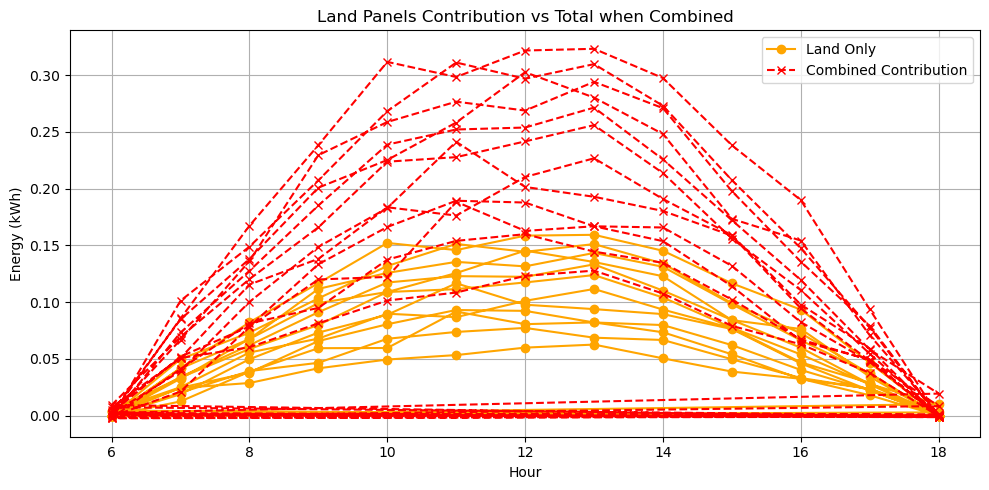

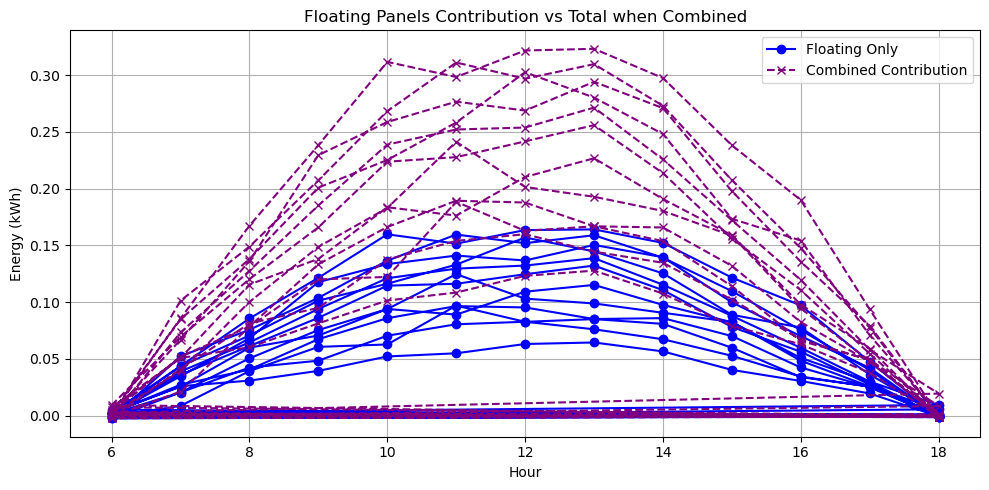

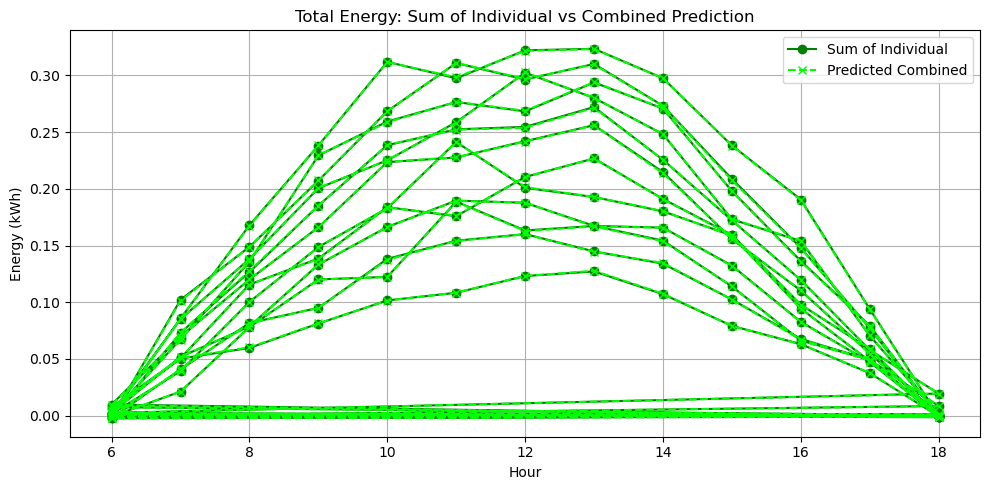

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# ---------------------------
# Generate dataset (semi-realistic)
# ---------------------------
np.random.seed(42)

hours = np.arange(6, 19)
months = np.arange(1, 13)
data = []

for month in months:
    month_factor = 0.3 + 0.05*month
    for hour in hours:
        irradiance_land = max(0, (np.sin((hour-6)/12*np.pi) * 1000 * month_factor) 
                             + np.random.normal(0, 30))
        irradiance_water = irradiance_land * 1.05 + np.random.normal(0, 10)
        temp_land = 10 + 15*month_factor + np.random.normal(0,2)
        water_temp = temp_land - np.random.uniform(2,5)
        panel_efficiency = 0.18
        area_land = 1
        area_water = 1
        energy_land = irradiance_land * area_land * panel_efficiency / 1000
        energy_water = irradiance_water * area_water * panel_efficiency / 1000
        electrolyzer_efficiency = 0.7
        h2_land = energy_land * electrolyzer_efficiency / 33.3
        h2_water = energy_water * electrolyzer_efficiency / 33.3
        data.append([month, hour, irradiance_land, temp_land, energy_land,
                     irradiance_water, water_temp, energy_water,
                     h2_land, h2_water])

columns = ['Month','Hour','Irradiance_land','Temp_land','Energy_land',
           'Irradiance_water','Water_temp','Energy_water','H2_land','H2_water']
df = pd.DataFrame(data, columns=columns)
df['Energy_total'] = df['Energy_land'] + df['Energy_water']

# ---------------------------
# ML Models
# ---------------------------
from sklearn.ensemble import RandomForestRegressor

# Land only
X_land = df[['Month','Hour','Irradiance_land','Temp_land']]
y_land = df['Energy_land']
model_land = RandomForestRegressor(n_estimators=200, random_state=42)
model_land.fit(X_land, y_land)
df['Land_pred'] = model_land.predict(X_land)

# Water only
X_water = df[['Month','Hour','Irradiance_water','Water_temp']]
y_water = df['Energy_water']
model_water = RandomForestRegressor(n_estimators=200, random_state=42)
model_water.fit(X_water, y_water)
df['Water_pred'] = model_water.predict(X_water)

# Both together
X_total = df[['Month','Hour','Irradiance_land','Temp_land','Irradiance_water','Water_temp']]
y_total = df['Energy_total']
model_total = RandomForestRegressor(n_estimators=200, random_state=42)
model_total.fit(X_total, y_total)
df['Total_pred'] = model_total.predict(X_total)

# ---------------------------
# Calculate differences
# ---------------------------
df['Land_diff'] = df['Total_pred'] - df['Land_pred']
df['Water_diff'] = df['Total_pred'] - df['Water_pred']

# ---------------------------
# Plot graphs for competition
# ---------------------------

# 1️⃣ Land difference
plt.figure(figsize=(10,5))
plt.plot(df['Hour'], df['Land_pred'], label='Land Only', color='orange', marker='o')
plt.plot(df['Hour'], df['Total_pred'], '--', label='Combined Contribution', color='red', marker='x')
plt.xlabel('Hour')
plt.ylabel('Energy (kWh)')
plt.title('Land Panels Contribution vs Total when Combined')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2️⃣ Water difference
plt.figure(figsize=(10,5))
plt.plot(df['Hour'], df['Water_pred'], label='Floating Only', color='blue', marker='o')
plt.plot(df['Hour'], df['Total_pred'], '--', label='Combined Contribution', color='purple', marker='x')
plt.xlabel('Hour')
plt.ylabel('Energy (kWh)')
plt.title('Floating Panels Contribution vs Total when Combined')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3️⃣ Total vs Sum of Individual
plt.figure(figsize=(10,5))
plt.plot(df['Hour'], df['Land_pred'] + df['Water_pred'], label='Sum of Individual', color='green', marker='o')
plt.plot(df['Hour'], df['Total_pred'], '--', label='Predicted Combined', color='lime', marker='x')
plt.xlabel('Hour')
plt.ylabel('Energy (kWh)')
plt.title('Total Energy: Sum of Individual vs Combined Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
import joblib

joblib.dump(model_land, "model_land.pkl")
joblib.dump(model_water, "model_water.pkl")
joblib.dump(model_total, "model_total.pkl")


['model_total.pkl']

In [12]:
import joblib

model_land = joblib.load("model_land.pkl")
model_water = joblib.load("model_water.pkl")
model_total = joblib.load("model_total.pkl")

# Example input
X_test = [[6, 12, 800, 25]]  # Month, Hour, Irradiance_land, Temp_land
print(model_land.predict(X_test))



[0.14432209]


c:\Users\kirit\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [15]:
import streamlit as st
import joblib
import numpy as np

# Load models
model_land = joblib.load("model_land.pkl")
model_water = joblib.load("model_water.pkl")
model_total = joblib.load("model_total.pkl")

st.title("🌞 Solar Energy Prediction Dashboard")

# User inputs
month = st.slider("Month", 1, 12, 6)
hour = st.slider("Hour", 6, 18, 12)

irr_land = st.number_input("Land Irradiance (W/m²)", value=800.0)
temp_land = st.number_input("Land Temperature (°C)", value=25.0)

irr_water = st.number_input("Water Irradiance (W/m²)", value=850.0)
temp_water = st.number_input("Water Temperature (°C)", value=22.0)

if st.button("Predict Energy"):
    land_pred = model_land.predict([[month, hour, irr_land, temp_land]])[0]
    water_pred = model_water.predict([[month, hour, irr_water, temp_water]])[0]
    total_pred = model_total.predict(
        [[month, hour, irr_land, temp_land, irr_water, temp_water]]
    )[0]

    st.success("### Prediction Results")
    st.write(f"🌱 Land Energy: **{land_pred:.3f} kWh**")
    st.write(f"🌊 Water Energy: **{water_pred:.3f} kWh**")
    st.write(f"⚡ Total Energy: **{total_pred:.3f} kWh**")


2026-02-09 01:09:38.897 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 01:09:38.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 01:09:38.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 01:09:38.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 01:09:38.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 01:09:38.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 01:09:38.905 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-09 01:09:38.906 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

SyntaxError: invalid syntax (507122745.py, line 1)